In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import*
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
thetaset = np.load('thetaset.npy')
saddleset = np.load('saddleset.npy')
rotangs = np.load('rotangs.npy')
alphabeta = np.load('alphabeta.npy') #Note the need to multiply 0.5 to the values in the loaded alphabeta
Evs = np.load('Evs.npy')
gamma, kappa = np.load('gammakappa.npy') #No need to multiply any combinatorial factors here
BWset = np.load('BWset.npy')

In [3]:
ival = 8
Ev = Evs[ival]
thetai = thetaset[ival] * IN_RADIAN
rotang = rotangs[ival][0] * IN_RADIAN
alpha,beta = 0.5* alphabeta[ival]
kx0,ky0 = saddleset[ival]

In [4]:
X = np.linspace(-0.055,0.055,200)
Y = np.linspace(-0.055,0.055,200)
X,Y,Z = data_for_contours(thetai=thetaset[ival],X=X,Y=Y)

### Generic Contour Plot

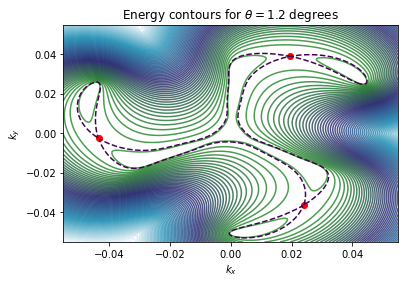

In [5]:
plt.contour(X,Y,Z, levels = 80,alpha=0.7,cmap='ocean')
plt.scatter(kx0,ky0,c='r')
kx120,ky120 = rot2D([kx0,ky0],2*np.pi/3)
plt.scatter(kx120,ky120,c='r')
kx240,ky240 = rot2D([kx0,ky0],4*np.pi/3)
plt.scatter(kx240,ky240,c='r')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title("Energy contours for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )
plt.contour(X,Y,Z,[Ev],linestyles='dashed', alpha=1,)
#plt.savefig('FigsPaper/ContoursLog.pdf')

### Fermi Surface plot

Text(0.5, 1.0, 'Fermi surfaces showing a lifshitz transition for $\\theta = $1.2 degrees')

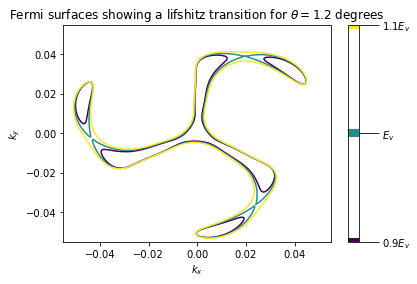

In [6]:
contour_set = [0.9*Ev,1*Ev,1.1*Ev]
#contour_set = np.linspace(0.8*Ev,1.2*Ev,3)
CS = plt.contour(X,Y,Z, contour_set)
cbar = plt.colorbar(CS)
cbar.ax.tick_params(size=20)
cbar.ax.set_yticklabels(['$0.9E_v$','$E_v$','$1.1E_v$'])
cbar.lines[0].set_linewidth(8)
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title("Fermi surfaces showing a lifshitz transition for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )
#plt.savefig('FigsPaper/LifshitzTransition.pdf')


### Seaborn Heatmaps

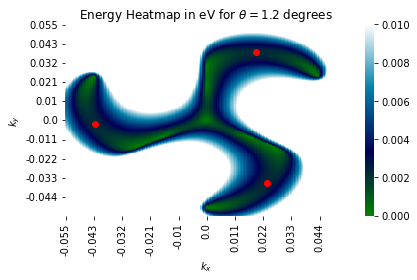

In [7]:
fig, ax = plt.subplots(1,1)
df = pd.DataFrame(Z[::-1])
df.columns = [int(xval *1000)/1000 for xval in X]
df.index = [int(yval *1000)/1000 for yval in Y][::-1]
sns.heatmap(df, vmin=0, vmax=0.01, fmt = '.3f', cmap = 'ocean', xticklabels=20, yticklabels=20)
ax.set_title("Energy Heatmap in eV for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')

fig.tight_layout()
#ax.scatter(0,100,c='r',marker = '*')
xset = [kx0,kx120,kx240]
yset = [ky0,ky120,ky240]
for kxval,kyval in zip(xset,yset):
    spacingx = (np.amax(X) - np.amin(X) )/ len(X)
    xindex = (kxval - np.amin(X))/spacingx
    spacingy = (np.amax(Y) - np.amin(Y))/ len(Y)
    yindex = (-kyval - np.amin(Y))/spacingy
    ax.scatter(xindex,yindex,c='r',alpha = 1)

plt.savefig('FigsPaper/LogvHS_Heatmap.pdf')
#plt.savefig('FigsPaper/Magic_Heatmap.pdf')

## JUST FOR FUN : discard this section later

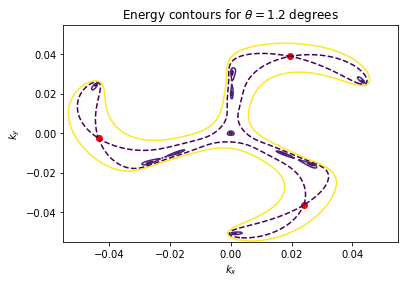

In [8]:
#plt.contour(X,Y,Z, levels = 80,alpha=0.7,cmap='ocean')
plt.scatter(kx0,ky0,c='r')
kx120,ky120 = rot2D([kx0,ky0],2*np.pi/3)
plt.scatter(kx120,ky120,c='r')
kx240,ky240 = rot2D([kx0,ky0],4*np.pi/3)
plt.scatter(kx240,ky240,c='r')
plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title("Energy contours for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees' )
plt.contour(X,Y,Z,[Ev],linestyles='dashed', alpha=1,)
#plt.savefig('FigsPaper/ContoursLog.pdf')
plt.contour(X,Y,Z,np.array([0.01,0.05,0.1,0.2,2])*Ev)

In [9]:
#newkx,newky = find_saddle((0,0.03),thetai) 
newkx,newky = find_saddle((0,0.04),thetai) 
print(newkx,newky)
newsad = generate_spectrum_Twisted_graphene_single_point(vF=vFpar,w=wpar,Theta=thetai,kx_fixed=newkx,ky_fixed=newky,symmetric=True)[4]
[newsad/Ev]

0.019544129699626153 0.03888480849049257


[1.0000000000022327]

C:\Users\Aravi\AppData\Local\Temp/ipykernel_99708/2310526890.py:5: UserWarning: No contour levels were found within the data range.
  plt.contour(newX,newY,newZ,[0,newsad,Ev])


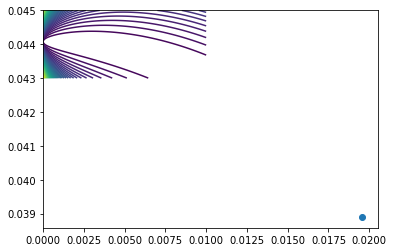

In [10]:
newY = np.linspace(0.043,0.045,200)
newX = np.linspace(-0.00001,0.01,200)
newX,newY,newZ = data_for_contours(1.05,X=newX,Y=newY)
plt.contour(newX,newY,newZ,levels=50)
plt.contour(newX,newY,newZ,[0,newsad,Ev])
plt.scatter(newkx,newky)

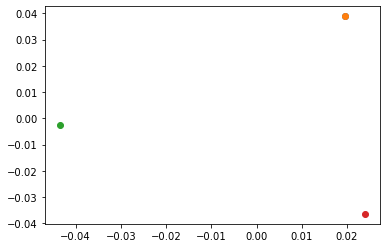

In [11]:
plt.scatter(newkx,newky)
plt.scatter(kx0,ky0)
plt.scatter(kx120,ky120)
plt.scatter(kx240,ky240)

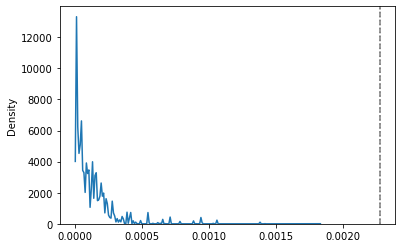

In [12]:
ax = plt.subplot()
ser = pd.Series(newZ.flatten())
sns.kdeplot(ser,ax=ax,clip = (0,0.005),bw_adjust=0.001)
ax.axvline(newsad,linestyle = '--',color='gray')
ax.axvline(Ev,linestyle = 'dotted',color='gray')

In [13]:
print(ret_alpha_beta_Ev(1.2, xGuess=[0,0.03]))
print(ret_alpha_beta_Ev(1.2))
print(ret_alpha_beta_Ev(1.2,xGuess = [0.0000001,-0.00000001]))
ret_alpha_beta_Ev(1.2, xGuess=[0,0.01])



(array([643.7251263 , -16.06131021]), 0.00044662558032925, (array([0.00043333, 0.02539964]), 303, 3))
(array([-3.93484822, 43.08153792]), 0.0022702984392676076, (array([0.01954413, 0.03888481]), 165, 4))
(array([-21.3485481 , 218.27439669]), 0.0016264160077428108, (array([ 0.00691973, -0.00440102]), 303, 3))


(array([218.27379021, -21.34864816]),
 0.0016264160077411208,
 (array([0.00035152, 0.00819312]), 69, 1))

In [14]:
print(ret_alpha_beta_Ev(1.05, xGuess=[0,0.03]))
print(ret_alpha_beta_Ev(1.05))
ret_alpha_beta_Ev(1.05, xGuess=[0,0.01])

(array([ 27.9457406 , -21.59287785]), 0.005140909473289421, (array([0.01137038, 0.02026244]), 123, 4))
(array([-1.05224064e-03,  7.63357044e+01]), 4.512924733571832e-07, (array([0.00990726, 0.04297587]), 303, 3))


(array([-32.36179168, 291.77748674]),
 4.780536104535401e-07,
 (array([-1.05500851e-04, -6.08272442e-05]), 234, 4))

[-4.12897594e-06  9.73823100e-07]
[-2.11445044e-06  1.36969000e-06]
[ 2.32066997e-08 -4.29684478e-07]


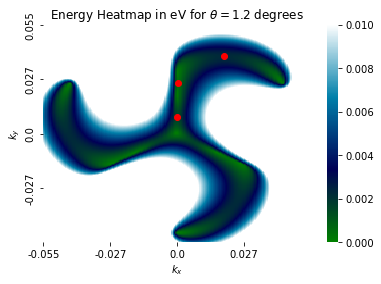

In [15]:
fig, ax = plt.subplots(1,1)
df = pd.DataFrame(Z[::-1])
df.columns = [int(xval *1000)/1000 for xval in X]
df.index = [int(yval *1000)/1000 for yval in Y][::-1]
sns.heatmap(df, vmin=0, vmax=0.01, fmt = '.3f', cmap = 'ocean', xticklabels=50, yticklabels=50)
ax.set_title("Energy Heatmap in eV for $\\theta = $" + str(int(thetaset[ival] * 100)/100) + ' degrees')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
p1x,p1y = ret_alpha_beta_Ev(1.2, xGuess=[0,0.03])[2][0]
p2x,p2y = ret_alpha_beta_Ev(1.2, xGuess=[0,0.01])[2][0]
p3x,p3y = ret_alpha_beta_Ev(1.2)[2][0]
#p4x,p4y = ret_alpha_beta_Ev(1.2, xGuess=[0,0])[2][0]
xset = [p1x,p2x,p3x]
yset = [p1y,p2y,p3y]
for kxval,kyval in zip(xset,yset):
    spacingx = (np.amax(X) - np.amin(X) )/ len(X)
    xindex = (kxval - np.amin(X))/spacingx
    spacingy = (np.amax(Y) - np.amin(Y))/ len(Y)
    yindex = (-kyval - np.amin(Y))/spacingy
    ax.scatter(xindex,yindex,c='r',alpha = 1)
    

print(FHpdvs(vF=vFpar, w=wpar, Theta=1.2*IN_RADIAN, kx_fixed=p1x, ky_fixed=p1y, symmetric=True))
print(FHpdvs(vF=vFpar, w=wpar, Theta=1.2*IN_RADIAN, kx_fixed=p2x, ky_fixed=p2y, symmetric=True))
print(FHpdvs(vF=vFpar, w=wpar, Theta=1.2*IN_RADIAN, kx_fixed=p3x, ky_fixed=p3y, symmetric=True))

In [16]:
print(ret_alpha_beta_Ev(1.175, xGuess=[0,0.03]))
print(ret_alpha_beta_Ev(1.175))
print(ret_alpha_beta_Ev(1.12,xGuess = [0.0,0.01]))

(array([150.63481776, -17.71600103]), 0.0015985307787286652, (array([0.00175482, 0.0249532 ]), 84, 2))
(array([-2.96703664, 43.00320465]), 0.0015673951816604008, (array([0.02005419, 0.03887892]), 147, 2))
(array([7.87593368e+04, 2.12475205e+01]), 2.0677112394245307e-06, (array([8.53590391e-07, 6.99366176e-03]), 153, 2))


The energies in meV are:  [12.38924318 12.38924318 12.38924318]
[6.03871331e-07 1.03077638e-06]
[1.58836825e-07 4.28261918e-07]
[1.42312542e-06 4.19916246e-07]
Points =  [[0.015774436835200988, 0.03716908336509885], [0.015774475842311647, 0.037169099524349186], [0.015774416138454074, 0.03716906199648878]]


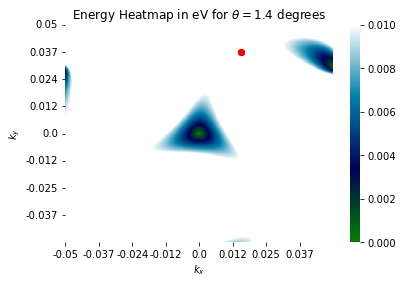

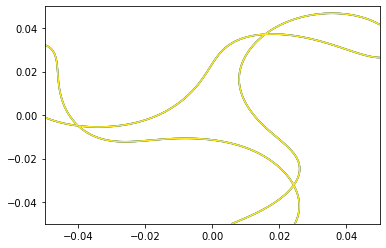

In [17]:
ang = 1.4
X,Y,Z = data_for_contours(ang)

fig, ax = plt.subplots(1,1)
df = pd.DataFrame(Z[::-1])
df.columns = [int(xval *1000)/1000 for xval in X]
df.index = [int(yval *1000)/1000 for yval in Y][::-1]
sns.heatmap(df, vmin=0, vmax=0.01, fmt = '.3f', cmap = 'ocean', xticklabels=50, yticklabels=50)
ax.set_title("Energy Heatmap in eV for $\\theta = $" + str(int(ang * 100)/100) + ' degrees')
ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
p3x,p3y = ret_alpha_beta_Ev(ang)[2][0]
p1x,p1y = ret_alpha_beta_Ev(ang, xGuess=[0,0.03])[2][0]
p2x,p2y = ret_alpha_beta_Ev(ang, xGuess=[0,0.01])[2][0]
E1 = ret_alpha_beta_Ev(ang, xGuess=[0,0.03])[1]
E2 = ret_alpha_beta_Ev(ang, xGuess=[0,0.01])[1]
E3 = ret_alpha_beta_Ev(ang)[1]
#p4x,p4y = ret_alpha_beta_Ev(1.2, xGuess=[0,0])[2][0]
xset = [p1x,p2x,p3x]
yset = [p1y,p2y,p3y]
for kxval,kyval in zip(xset,yset):
    spacingx = (np.amax(X) - np.amin(X) )/ len(X)
    xindex = (kxval - np.amin(X))/spacingx
    spacingy = (np.amax(Y) - np.amin(Y))/ len(Y)
    yindex = (-kyval - np.amin(Y))/spacingy
    ax.scatter(xindex,yindex,c='r',alpha = 1)
    
print("The energies in meV are: ", np.sort(np.array([E1,E2,E3])*1000)) 

print(FHpdvs(vF=vFpar, w=wpar, Theta=ang*IN_RADIAN, kx_fixed=p1x, ky_fixed=p1y, symmetric=True))
print(FHpdvs(vF=vFpar, w=wpar, Theta=ang*IN_RADIAN, kx_fixed=p2x, ky_fixed=p2y, symmetric=True))
print(FHpdvs(vF=vFpar, w=wpar, Theta=ang*IN_RADIAN, kx_fixed=p3x, ky_fixed=p3y, symmetric=True))
print("Points = ", list(map(list, zip(xset, yset))))
plt.show()
ax2 = plt.subplot()
ax2.contour(X,Y,Z,levels=np.sort([E1,E2,E3]))